# Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from Cleveland data from the UCI machine learning repository. 
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * Atypical angina: chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart related)
    *  Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    * Nothing to note
    * ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * Upsloping: better heart rate with excercise (uncommon)
    * Flatsloping: minimal change (typical healthy heart)
    * Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)



## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject expert matter on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why you should care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there are?
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

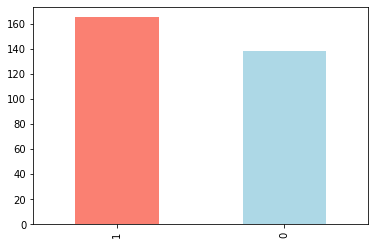

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


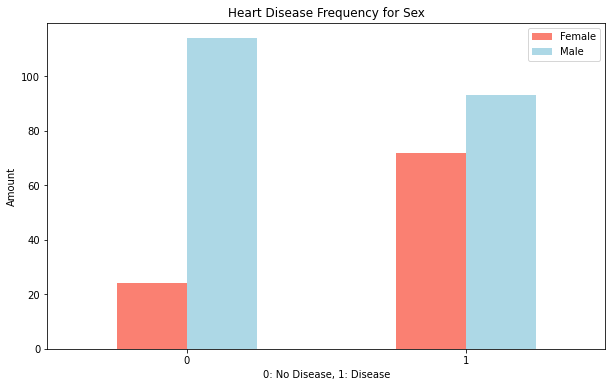

In [12]:
# Create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0: No Disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

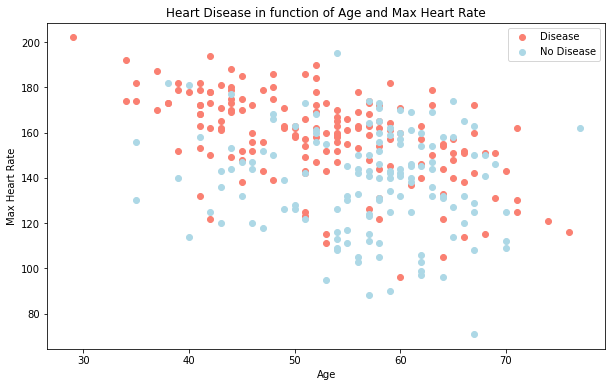

In [13]:
# Create another figgure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c='salmon'
           )

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='lightblue'
           )

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<AxesSubplot:ylabel='Frequency'>

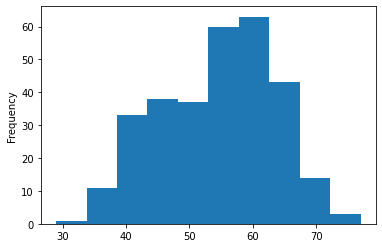

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


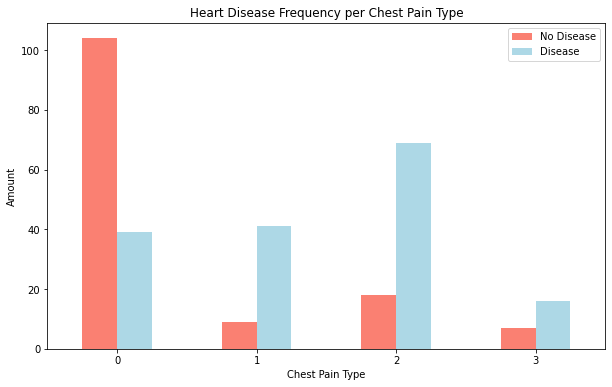

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]
                                  );

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
# Make a correlational matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


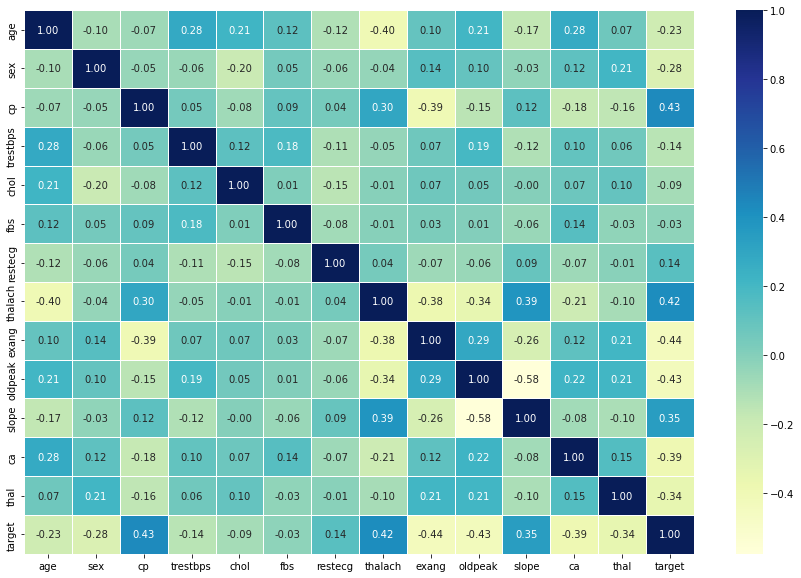

In [3]:
# Let's make our correlatioal matrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap="YlGnBu")

## 5. Modelling

In [4]:
# Split data into X & y
X = df.drop("target", axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (using the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [6]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : A dict of different Scikit-Learn machine learning models.
    X_train : Training data (No labels)
    X_test : Testing data (No labels)
    y_train : Training labels
    y_test : Test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores dict
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test
                            )
model_scores

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

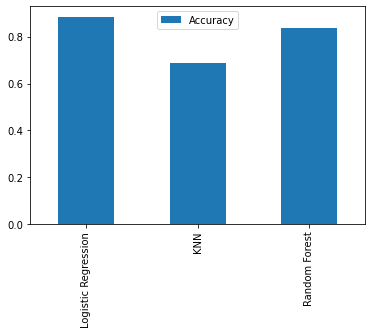

In [26]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning 
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [7]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of differernt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test)) 

In [8]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


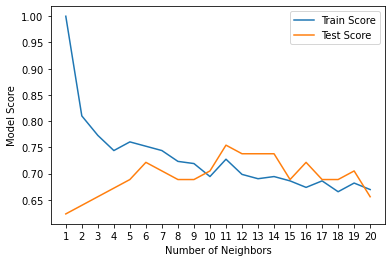

In [30]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV 

In [9]:
# Create a hyperparameter grid for LogisticRegrerssion
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]
               }

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)
          } 

In [11]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2
                               )

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [12]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [13]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [14]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2
                          )

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.8s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [15]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [16]:
# Score the best model for RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best score so far we'll try and improve them again using GridSearchCV

In [17]:
# Different hyperparameter grid for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]
               }

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2
                         )

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [18]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [19]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall
* F1-score

... and it would be great if cross-validation is used wherever possible

To make comparsions and evaluate our trained models, first we need to make predictions

In [20]:
# Make predicitions with tuned models
y_preds = gs_log_reg.predict(X_test)

In [21]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [22]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

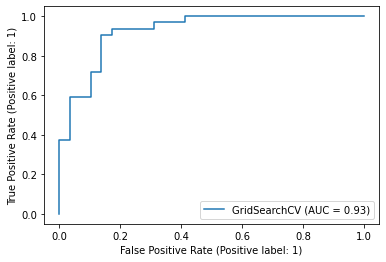

In [23]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [24]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


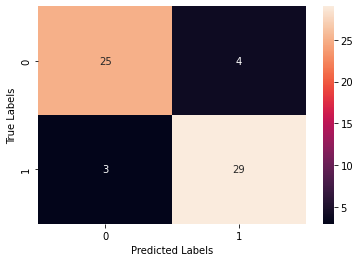

In [25]:
confusion_mtrx = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
confusion_mtrx.set(xlabel='Predicted Labels', ylabel='True Labels');

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [26]:
print(classification_report(y_test, y_preds));

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` 

In [27]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [28]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [29]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [30]:
# Cross-validated precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [31]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [32]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

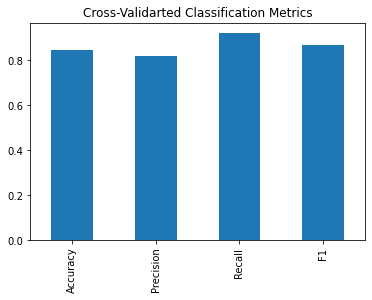

In [33]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_prec,
                           "Recall" : cv_recall,
                           "F1" : cv_f1
                          }, index=[0])

cv_metrics.T.plot.bar(title="Cross-Validarted Classification Metrics", legend=False);

### Feature importance

Feature importance is another way of asking, "which features contribute most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

In [34]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [35]:
# Check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [36]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

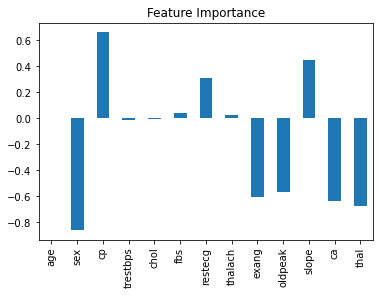

In [37]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you try a better model? (Catboosts, XGBoost)
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?   

In [42]:
# Use catboost model
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6846994	total: 3.92ms	remaining: 1.96s
2:	learn: 0.6804470	total: 5.76ms	remaining: 1.91s
3:	learn: 0.6762242	total: 7.66ms	remaining: 1.91s
4:	learn: 0.6716784	total: 9.68ms	remaining: 1.93s
5:	learn: 0.6672808	total: 11.5ms	remaining: 1.9s
6:	learn: 0.6639958	total: 13.2ms	remaining: 1.87s
7:	learn: 0.6601980	total: 15ms	remaining: 1.86s
8:	learn: 0.6563766	total: 16.8ms	remaining: 1.85s
9:	learn: 0.6525103	total: 19.4ms	remaining: 1.92s
10:	learn: 0.6483670	total: 20.8ms	remaining: 1.87s
11:	learn: 0.6448827	total: 22.5ms	remaining: 1.85s
12:	learn: 0.6412767	total: 24.4ms	remaining: 1.85s
13:	learn: 0.6374286	total: 26.3ms	remaining: 1.85s
14:	learn: 0.6335427	total: 28.4ms	remaining: 1.87s
15:	learn: 0.6288052	total: 30.4ms	remaining: 1.87s
16:	learn: 0.6250489	total: 32.4ms	remaining: 1.87s
17:	learn: 0.6209495	total: 34.2ms	remaining: 1.87s
18:	learn: 0.6181899	total: 36ms	remaining: 1.8

174:	learn: 0.3434681	total: 500ms	remaining: 2.36s
175:	learn: 0.3430162	total: 503ms	remaining: 2.35s
176:	learn: 0.3423742	total: 506ms	remaining: 2.35s
177:	learn: 0.3422003	total: 507ms	remaining: 2.34s
178:	learn: 0.3414762	total: 510ms	remaining: 2.34s
179:	learn: 0.3401759	total: 513ms	remaining: 2.34s
180:	learn: 0.3397173	total: 516ms	remaining: 2.33s
181:	learn: 0.3388977	total: 518ms	remaining: 2.33s
182:	learn: 0.3379224	total: 520ms	remaining: 2.32s
183:	learn: 0.3371813	total: 522ms	remaining: 2.31s
184:	learn: 0.3368890	total: 523ms	remaining: 2.31s
185:	learn: 0.3357595	total: 526ms	remaining: 2.3s
186:	learn: 0.3350316	total: 527ms	remaining: 2.29s
187:	learn: 0.3339623	total: 529ms	remaining: 2.29s
188:	learn: 0.3333955	total: 532ms	remaining: 2.28s
189:	learn: 0.3321844	total: 534ms	remaining: 2.28s
190:	learn: 0.3318179	total: 536ms	remaining: 2.27s
191:	learn: 0.3310974	total: 538ms	remaining: 2.27s
192:	learn: 0.3300926	total: 541ms	remaining: 2.26s
193:	learn: 0

333:	learn: 0.2474850	total: 986ms	remaining: 1.97s
334:	learn: 0.2469451	total: 990ms	remaining: 1.96s
335:	learn: 0.2463614	total: 994ms	remaining: 1.96s
336:	learn: 0.2458106	total: 996ms	remaining: 1.96s
337:	learn: 0.2453766	total: 999ms	remaining: 1.96s
338:	learn: 0.2450810	total: 1s	remaining: 1.95s
339:	learn: 0.2445433	total: 1s	remaining: 1.95s
340:	learn: 0.2444972	total: 1s	remaining: 1.94s
341:	learn: 0.2440022	total: 1.01s	remaining: 1.94s
342:	learn: 0.2436683	total: 1.01s	remaining: 1.93s
343:	learn: 0.2432819	total: 1.01s	remaining: 1.93s
344:	learn: 0.2427989	total: 1.01s	remaining: 1.92s
345:	learn: 0.2420940	total: 1.01s	remaining: 1.92s
346:	learn: 0.2416286	total: 1.02s	remaining: 1.92s
347:	learn: 0.2413824	total: 1.02s	remaining: 1.91s
348:	learn: 0.2410783	total: 1.02s	remaining: 1.91s
349:	learn: 0.2406212	total: 1.03s	remaining: 1.91s
350:	learn: 0.2403829	total: 1.03s	remaining: 1.91s
351:	learn: 0.2396747	total: 1.03s	remaining: 1.91s
352:	learn: 0.2394747

506:	learn: 0.1920762	total: 1.47s	remaining: 1.43s
507:	learn: 0.1919134	total: 1.48s	remaining: 1.43s
508:	learn: 0.1915182	total: 1.48s	remaining: 1.43s
509:	learn: 0.1912839	total: 1.48s	remaining: 1.42s
510:	learn: 0.1911050	total: 1.49s	remaining: 1.42s
511:	learn: 0.1907812	total: 1.49s	remaining: 1.42s
512:	learn: 0.1907129	total: 1.49s	remaining: 1.42s
513:	learn: 0.1904574	total: 1.49s	remaining: 1.41s
514:	learn: 0.1900422	total: 1.5s	remaining: 1.41s
515:	learn: 0.1898838	total: 1.5s	remaining: 1.41s
516:	learn: 0.1896718	total: 1.5s	remaining: 1.4s
517:	learn: 0.1894975	total: 1.5s	remaining: 1.4s
518:	learn: 0.1891323	total: 1.5s	remaining: 1.39s
519:	learn: 0.1888891	total: 1.51s	remaining: 1.39s
520:	learn: 0.1886605	total: 1.51s	remaining: 1.39s
521:	learn: 0.1882819	total: 1.51s	remaining: 1.39s
522:	learn: 0.1879103	total: 1.52s	remaining: 1.38s
523:	learn: 0.1876983	total: 1.52s	remaining: 1.38s
524:	learn: 0.1873621	total: 1.53s	remaining: 1.38s
525:	learn: 0.18721

719:	learn: 0.1457588	total: 2.13s	remaining: 827ms
720:	learn: 0.1455599	total: 2.13s	remaining: 824ms
721:	learn: 0.1454410	total: 2.13s	remaining: 821ms
722:	learn: 0.1452848	total: 2.13s	remaining: 818ms
723:	learn: 0.1451279	total: 2.14s	remaining: 815ms
724:	learn: 0.1449805	total: 2.14s	remaining: 812ms
725:	learn: 0.1448067	total: 2.14s	remaining: 808ms
726:	learn: 0.1446343	total: 2.14s	remaining: 805ms
727:	learn: 0.1445055	total: 2.15s	remaining: 801ms
728:	learn: 0.1443396	total: 2.15s	remaining: 798ms
729:	learn: 0.1441348	total: 2.15s	remaining: 795ms
730:	learn: 0.1440498	total: 2.15s	remaining: 792ms
731:	learn: 0.1439401	total: 2.15s	remaining: 789ms
732:	learn: 0.1436774	total: 2.16s	remaining: 785ms
733:	learn: 0.1434709	total: 2.16s	remaining: 782ms
734:	learn: 0.1433030	total: 2.16s	remaining: 779ms
735:	learn: 0.1430589	total: 2.16s	remaining: 776ms
736:	learn: 0.1428575	total: 2.17s	remaining: 773ms
737:	learn: 0.1427387	total: 2.17s	remaining: 770ms
738:	learn: 

922:	learn: 0.1141102	total: 2.77s	remaining: 232ms
923:	learn: 0.1139413	total: 2.78s	remaining: 229ms
924:	learn: 0.1138215	total: 2.78s	remaining: 226ms
925:	learn: 0.1136710	total: 2.79s	remaining: 223ms
926:	learn: 0.1135234	total: 2.79s	remaining: 220ms
927:	learn: 0.1133317	total: 2.79s	remaining: 217ms
928:	learn: 0.1131934	total: 2.8s	remaining: 214ms
929:	learn: 0.1130751	total: 2.8s	remaining: 211ms
930:	learn: 0.1129860	total: 2.8s	remaining: 208ms
931:	learn: 0.1127993	total: 2.81s	remaining: 205ms
932:	learn: 0.1126122	total: 2.81s	remaining: 202ms
933:	learn: 0.1124583	total: 2.81s	remaining: 199ms
934:	learn: 0.1124221	total: 2.81s	remaining: 196ms
935:	learn: 0.1122122	total: 2.81s	remaining: 193ms
936:	learn: 0.1121434	total: 2.82s	remaining: 190ms
937:	learn: 0.1120469	total: 2.82s	remaining: 187ms
938:	learn: 0.1119567	total: 2.83s	remaining: 184ms
939:	learn: 0.1118173	total: 2.83s	remaining: 181ms
940:	learn: 0.1116181	total: 2.83s	remaining: 178ms
941:	learn: 0.1

In [43]:
catboost.score(X_test, y_test)

0.8360655737704918

### Hyperparameter tuning on catboost

In [55]:
catboost_grid = {'depth' : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
                 }

rs_catboost = RandomizedSearchCV(CatBoostClassifier(),
                           param_distributions=catboost_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2
                          )

rs_catboost.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.6904970	total: 2.94ms	remaining: 55.8ms
1:	learn: 0.6874336	total: 4.95ms	remaining: 44.5ms
2:	learn: 0.6848552	total: 7.91ms	remaining: 44.8ms
3:	learn: 0.6829529	total: 11.7ms	remaining: 46.9ms
4:	learn: 0.6804905	total: 13.8ms	remaining: 41.4ms
5:	learn: 0.6775555	total: 15.9ms	remaining: 37.2ms
6:	learn: 0.6751458	total: 18.8ms	remaining: 35ms
7:	learn: 0.6735562	total: 21.8ms	remaining: 32.7ms
8:	learn: 0.6713739	total: 25.1ms	remaining: 30.7ms
9:	learn: 0.6701580	total: 28.1ms	remaining: 28.1ms
10:	learn: 0.6685097	total: 31.2ms	remaining: 25.6ms
11:	learn: 0.6658804	total: 35ms	remaining: 23.3ms
12:	learn: 0.6629896	total: 36.6ms	remaining: 19.7ms
13:	learn: 0.6614158	total: 42.5ms	remaining: 18.2ms
14:	learn: 0.6590285	total: 47.2ms	remaining: 15.7ms
15:	learn: 0.6572398	total: 52.6ms	remaining: 13.2ms
16:	learn: 0.6549236	total: 57.8ms	remaining: 10.2ms
17:	learn: 0.6527487	total: 65ms	remaining: 7.22ms


50:	learn: 0.5228153	total: 495ms	remaining: 184ms
51:	learn: 0.5205209	total: 496ms	remaining: 172ms
52:	learn: 0.5174221	total: 508ms	remaining: 163ms
53:	learn: 0.5152857	total: 519ms	remaining: 154ms
54:	learn: 0.5135319	total: 530ms	remaining: 145ms
55:	learn: 0.5115513	total: 547ms	remaining: 137ms
56:	learn: 0.5101127	total: 562ms	remaining: 128ms
57:	learn: 0.5084521	total: 579ms	remaining: 120ms
58:	learn: 0.5068819	total: 593ms	remaining: 111ms
59:	learn: 0.5047778	total: 605ms	remaining: 101ms
60:	learn: 0.5032101	total: 620ms	remaining: 91.5ms
61:	learn: 0.5016601	total: 636ms	remaining: 82ms
62:	learn: 0.4999685	total: 651ms	remaining: 72.4ms
63:	learn: 0.4985551	total: 666ms	remaining: 62.4ms
64:	learn: 0.4970513	total: 682ms	remaining: 52.5ms
65:	learn: 0.4944786	total: 689ms	remaining: 41.7ms
66:	learn: 0.4927260	total: 701ms	remaining: 31.4ms
67:	learn: 0.4909001	total: 704ms	remaining: 20.7ms
68:	learn: 0.4893375	total: 719ms	remaining: 10.4ms
69:	learn: 0.4879038	tot

9:	learn: 0.6552123	total: 93ms	remaining: 558ms
10:	learn: 0.6530817	total: 107ms	remaining: 576ms
11:	learn: 0.6494262	total: 124ms	remaining: 598ms
12:	learn: 0.6462610	total: 139ms	remaining: 608ms
13:	learn: 0.6423325	total: 143ms	remaining: 572ms
14:	learn: 0.6397827	total: 155ms	remaining: 569ms
15:	learn: 0.6356441	total: 158ms	remaining: 532ms
16:	learn: 0.6332594	total: 170ms	remaining: 529ms
17:	learn: 0.6307547	total: 182ms	remaining: 526ms
18:	learn: 0.6274266	total: 187ms	remaining: 501ms
19:	learn: 0.6232182	total: 189ms	remaining: 474ms
20:	learn: 0.6205199	total: 196ms	remaining: 458ms
21:	learn: 0.6184066	total: 208ms	remaining: 454ms
22:	learn: 0.6144126	total: 209ms	remaining: 427ms
23:	learn: 0.6112919	total: 221ms	remaining: 424ms
24:	learn: 0.6092016	total: 234ms	remaining: 421ms
25:	learn: 0.6060399	total: 246ms	remaining: 416ms
26:	learn: 0.6034170	total: 258ms	remaining: 411ms
27:	learn: 0.6001970	total: 260ms	remaining: 390ms
28:	learn: 0.5980851	total: 273ms

13:	learn: 0.6146192	total: 64.1ms	remaining: 27.5ms
14:	learn: 0.6078223	total: 66.6ms	remaining: 22.2ms
15:	learn: 0.6036177	total: 70.2ms	remaining: 17.6ms
16:	learn: 0.6005788	total: 74.1ms	remaining: 13.1ms
17:	learn: 0.5973596	total: 78.2ms	remaining: 8.68ms
18:	learn: 0.5938597	total: 81.8ms	remaining: 4.31ms
19:	learn: 0.5895256	total: 85.5ms	remaining: 0us
[CV] END .........depth=8, iterations=20, learning_rate=0.03; total time=   0.0s
0:	learn: 0.6867711	total: 4.56ms	remaining: 86.7ms
1:	learn: 0.6795914	total: 8.01ms	remaining: 72.1ms
2:	learn: 0.6732557	total: 12.4ms	remaining: 70.4ms
3:	learn: 0.6682579	total: 17.1ms	remaining: 68.3ms
4:	learn: 0.6639112	total: 21.4ms	remaining: 64.1ms
5:	learn: 0.6588625	total: 26ms	remaining: 60.7ms
6:	learn: 0.6529260	total: 30.1ms	remaining: 56ms
7:	learn: 0.6468074	total: 34.7ms	remaining: 52.1ms
8:	learn: 0.6428463	total: 39.4ms	remaining: 48.1ms
9:	learn: 0.6370965	total: 44ms	remaining: 44ms
10:	learn: 0.6321663	total: 48.6ms	rema

46:	learn: 0.5861336	total: 96.3ms	remaining: 67.6ms
47:	learn: 0.5849052	total: 99.6ms	remaining: 66.4ms
48:	learn: 0.5834011	total: 101ms	remaining: 64.1ms
49:	learn: 0.5819677	total: 103ms	remaining: 61.8ms
50:	learn: 0.5800004	total: 104ms	remaining: 59.3ms
51:	learn: 0.5781635	total: 106ms	remaining: 57ms
52:	learn: 0.5763071	total: 107ms	remaining: 54.6ms
53:	learn: 0.5745900	total: 109ms	remaining: 52.4ms
54:	learn: 0.5731875	total: 110ms	remaining: 50.2ms
55:	learn: 0.5711904	total: 112ms	remaining: 47.8ms
56:	learn: 0.5696779	total: 113ms	remaining: 45.6ms
57:	learn: 0.5677859	total: 114ms	remaining: 43.3ms
58:	learn: 0.5662076	total: 115ms	remaining: 41ms
59:	learn: 0.5646023	total: 117ms	remaining: 38.9ms
60:	learn: 0.5629811	total: 118ms	remaining: 36.6ms
61:	learn: 0.5610548	total: 119ms	remaining: 34.5ms
62:	learn: 0.5598485	total: 120ms	remaining: 32.4ms
63:	learn: 0.5581673	total: 122ms	remaining: 30.5ms
64:	learn: 0.5566416	total: 123ms	remaining: 28.4ms
65:	learn: 0.5

1:	learn: 0.6875355	total: 4.16ms	remaining: 162ms
2:	learn: 0.6853423	total: 6.12ms	remaining: 157ms
3:	learn: 0.6827848	total: 7.87ms	remaining: 150ms
4:	learn: 0.6803512	total: 9.44ms	remaining: 142ms
5:	learn: 0.6773640	total: 11.1ms	remaining: 137ms
6:	learn: 0.6751995	total: 12.8ms	remaining: 133ms
7:	learn: 0.6729813	total: 14.3ms	remaining: 129ms
8:	learn: 0.6704111	total: 16.1ms	remaining: 127ms
9:	learn: 0.6679742	total: 17.7ms	remaining: 124ms
10:	learn: 0.6652119	total: 19.5ms	remaining: 123ms
11:	learn: 0.6624309	total: 21ms	remaining: 119ms
12:	learn: 0.6602626	total: 22.5ms	remaining: 116ms
13:	learn: 0.6575355	total: 23.8ms	remaining: 112ms
14:	learn: 0.6547483	total: 25.3ms	remaining: 110ms
15:	learn: 0.6523859	total: 27.1ms	remaining: 108ms
16:	learn: 0.6498327	total: 28.6ms	remaining: 106ms
17:	learn: 0.6478693	total: 30.1ms	remaining: 104ms
18:	learn: 0.6452103	total: 31.6ms	remaining: 101ms
19:	learn: 0.6427032	total: 32.9ms	remaining: 98.6ms
20:	learn: 0.6402634	t

43:	learn: 0.5418368	total: 140ms	remaining: 19.1ms
44:	learn: 0.5391700	total: 143ms	remaining: 15.9ms
45:	learn: 0.5369233	total: 146ms	remaining: 12.7ms
46:	learn: 0.5348401	total: 148ms	remaining: 9.45ms
47:	learn: 0.5323625	total: 150ms	remaining: 6.27ms
48:	learn: 0.5298750	total: 153ms	remaining: 3.12ms
49:	learn: 0.5274731	total: 155ms	remaining: 0us
[CV] END .........depth=7, iterations=50, learning_rate=0.02; total time=   0.1s
0:	learn: 0.6880430	total: 3.51ms	remaining: 172ms
1:	learn: 0.6840256	total: 7.04ms	remaining: 169ms
2:	learn: 0.6801803	total: 10.6ms	remaining: 165ms
3:	learn: 0.6767503	total: 13.8ms	remaining: 158ms
4:	learn: 0.6709875	total: 16.1ms	remaining: 145ms
5:	learn: 0.6671265	total: 19.8ms	remaining: 145ms
6:	learn: 0.6615461	total: 21.1ms	remaining: 130ms
7:	learn: 0.6570604	total: 23.7ms	remaining: 124ms
8:	learn: 0.6533671	total: 26.9ms	remaining: 123ms
9:	learn: 0.6499202	total: 30ms	remaining: 120ms
10:	learn: 0.6465930	total: 33.7ms	remaining: 119m

21:	learn: 0.5553848	total: 64.3ms	remaining: 111ms
22:	learn: 0.5502583	total: 68.4ms	remaining: 110ms
23:	learn: 0.5472069	total: 71.8ms	remaining: 108ms
24:	learn: 0.5428165	total: 75.1ms	remaining: 105ms
25:	learn: 0.5393942	total: 78.4ms	remaining: 102ms
26:	learn: 0.5349908	total: 81.9ms	remaining: 100ms
27:	learn: 0.5310301	total: 85.2ms	remaining: 97.4ms
28:	learn: 0.5268392	total: 88.4ms	remaining: 94.5ms
29:	learn: 0.5227353	total: 91.8ms	remaining: 91.8ms
30:	learn: 0.5184320	total: 95.3ms	remaining: 89.1ms
31:	learn: 0.5139911	total: 98.9ms	remaining: 86.5ms
32:	learn: 0.5110169	total: 105ms	remaining: 86ms
33:	learn: 0.5077044	total: 111ms	remaining: 85.1ms
34:	learn: 0.5036805	total: 116ms	remaining: 82.9ms
35:	learn: 0.4996660	total: 121ms	remaining: 80.9ms
36:	learn: 0.4972189	total: 126ms	remaining: 78.3ms
37:	learn: 0.4935010	total: 130ms	remaining: 75ms
38:	learn: 0.4899228	total: 133ms	remaining: 71.5ms
39:	learn: 0.4866748	total: 136ms	remaining: 68ms
40:	learn: 0.

27:	learn: 0.5514846	total: 80.6ms	remaining: 92.1ms
28:	learn: 0.5478871	total: 84ms	remaining: 89.8ms
29:	learn: 0.5439905	total: 87.5ms	remaining: 87.5ms
30:	learn: 0.5407983	total: 90.8ms	remaining: 84.9ms
31:	learn: 0.5376892	total: 94.4ms	remaining: 82.6ms
32:	learn: 0.5343703	total: 97.6ms	remaining: 79.9ms
33:	learn: 0.5313595	total: 101ms	remaining: 77ms
34:	learn: 0.5279887	total: 104ms	remaining: 74.4ms
35:	learn: 0.5246737	total: 107ms	remaining: 71.6ms
36:	learn: 0.5217567	total: 111ms	remaining: 68.9ms
37:	learn: 0.5186960	total: 115ms	remaining: 66.3ms
38:	learn: 0.5152311	total: 119ms	remaining: 64.2ms
39:	learn: 0.5113892	total: 121ms	remaining: 60.7ms
40:	learn: 0.5074780	total: 126ms	remaining: 58.3ms
41:	learn: 0.5036475	total: 130ms	remaining: 55.6ms
42:	learn: 0.5010958	total: 133ms	remaining: 52.7ms
43:	learn: 0.4974401	total: 136ms	remaining: 49.6ms
44:	learn: 0.4939755	total: 140ms	remaining: 46.6ms
45:	learn: 0.4918977	total: 143ms	remaining: 43.6ms
46:	learn:

51:	learn: 0.4529500	total: 93.9ms	remaining: 14.4ms
52:	learn: 0.4503321	total: 96.9ms	remaining: 12.8ms
53:	learn: 0.4481982	total: 99.4ms	remaining: 11ms
54:	learn: 0.4464060	total: 102ms	remaining: 9.24ms
55:	learn: 0.4438138	total: 104ms	remaining: 7.4ms
56:	learn: 0.4418420	total: 106ms	remaining: 5.56ms
57:	learn: 0.4392695	total: 108ms	remaining: 3.72ms
58:	learn: 0.4374022	total: 110ms	remaining: 1.86ms
59:	learn: 0.4352041	total: 112ms	remaining: 0us
[CV] END .........depth=5, iterations=60, learning_rate=0.03; total time=   0.1s
0:	learn: 0.6843157	total: 1.69ms	remaining: 100ms
1:	learn: 0.6759167	total: 3.23ms	remaining: 93.6ms
2:	learn: 0.6696172	total: 5.12ms	remaining: 97.3ms
3:	learn: 0.6611205	total: 7.25ms	remaining: 101ms
4:	learn: 0.6543216	total: 9.1ms	remaining: 100ms
5:	learn: 0.6472617	total: 11ms	remaining: 99.1ms
6:	learn: 0.6410770	total: 12.9ms	remaining: 98ms
7:	learn: 0.6343012	total: 15ms	remaining: 97.4ms
8:	learn: 0.6271623	total: 17.1ms	remaining: 96.

45:	learn: 0.4736951	total: 94.1ms	remaining: 28.6ms
46:	learn: 0.4706602	total: 96.2ms	remaining: 26.6ms
47:	learn: 0.4678929	total: 98.5ms	remaining: 24.6ms
48:	learn: 0.4647256	total: 100ms	remaining: 22.5ms
49:	learn: 0.4622342	total: 102ms	remaining: 20.4ms
50:	learn: 0.4593332	total: 103ms	remaining: 18.3ms
51:	learn: 0.4560481	total: 105ms	remaining: 16.1ms
52:	learn: 0.4538224	total: 106ms	remaining: 14ms
53:	learn: 0.4514773	total: 108ms	remaining: 12ms
54:	learn: 0.4495884	total: 109ms	remaining: 9.93ms
55:	learn: 0.4472879	total: 110ms	remaining: 7.89ms
56:	learn: 0.4445633	total: 112ms	remaining: 5.88ms
57:	learn: 0.4421813	total: 113ms	remaining: 3.89ms
58:	learn: 0.4399639	total: 114ms	remaining: 1.93ms
59:	learn: 0.4374006	total: 115ms	remaining: 0us
[CV] END .........depth=5, iterations=60, learning_rate=0.03; total time=   0.1s
0:	learn: 0.6867670	total: 1.51ms	remaining: 28.7ms
1:	learn: 0.6808701	total: 3.01ms	remaining: 27.1ms
2:	learn: 0.6756520	total: 5.06ms	remai

58:	learn: 0.3985603	total: 252ms	remaining: 4.27ms
59:	learn: 0.3959414	total: 257ms	remaining: 0us
[CV] END .........depth=8, iterations=60, learning_rate=0.04; total time=   0.2s
0:	learn: 0.6838325	total: 5.72ms	remaining: 337ms
1:	learn: 0.6727633	total: 8.89ms	remaining: 258ms
2:	learn: 0.6648004	total: 13.3ms	remaining: 252ms
3:	learn: 0.6578598	total: 17.5ms	remaining: 245ms
4:	learn: 0.6500161	total: 20.9ms	remaining: 230ms
5:	learn: 0.6412382	total: 24ms	remaining: 216ms
6:	learn: 0.6348829	total: 28.4ms	remaining: 215ms
7:	learn: 0.6288824	total: 32.7ms	remaining: 213ms
8:	learn: 0.6224352	total: 37ms	remaining: 210ms
9:	learn: 0.6181778	total: 41.4ms	remaining: 207ms
10:	learn: 0.6131369	total: 45.6ms	remaining: 203ms
11:	learn: 0.6055605	total: 50.2ms	remaining: 201ms
12:	learn: 0.5993269	total: 54.5ms	remaining: 197ms
13:	learn: 0.5934546	total: 58.6ms	remaining: 193ms
14:	learn: 0.5851241	total: 61.6ms	remaining: 185ms
15:	learn: 0.5800511	total: 66.3ms	remaining: 182ms


46:	learn: 0.4601012	total: 208ms	remaining: 57.4ms
47:	learn: 0.4565835	total: 213ms	remaining: 53.2ms
48:	learn: 0.4534633	total: 218ms	remaining: 48.9ms
49:	learn: 0.4508175	total: 223ms	remaining: 44.5ms
50:	learn: 0.4472968	total: 227ms	remaining: 40.1ms
51:	learn: 0.4437702	total: 232ms	remaining: 35.7ms
52:	learn: 0.4409960	total: 237ms	remaining: 31.3ms
53:	learn: 0.4384034	total: 243ms	remaining: 27ms
54:	learn: 0.4361143	total: 249ms	remaining: 22.6ms
55:	learn: 0.4330266	total: 252ms	remaining: 18ms
56:	learn: 0.4298412	total: 257ms	remaining: 13.5ms
57:	learn: 0.4265831	total: 258ms	remaining: 8.9ms
58:	learn: 0.4241641	total: 263ms	remaining: 4.46ms
59:	learn: 0.4214497	total: 268ms	remaining: 0us
[CV] END .........depth=8, iterations=60, learning_rate=0.04; total time=   0.2s
0:	learn: 0.6847397	total: 5.54ms	remaining: 327ms
1:	learn: 0.6740296	total: 9.09ms	remaining: 264ms
2:	learn: 0.6660909	total: 13.5ms	remaining: 257ms
3:	learn: 0.6602182	total: 17.9ms	remaining: 2

1:	learn: 0.6878768	total: 5.2ms	remaining: 46.8ms
2:	learn: 0.6853567	total: 7.73ms	remaining: 43.8ms
3:	learn: 0.6827530	total: 10.7ms	remaining: 42.7ms
4:	learn: 0.6805911	total: 13ms	remaining: 39.1ms
5:	learn: 0.6779799	total: 15.2ms	remaining: 35.6ms
6:	learn: 0.6754967	total: 17.6ms	remaining: 32.8ms
7:	learn: 0.6734194	total: 19.9ms	remaining: 29.8ms
8:	learn: 0.6709087	total: 22ms	remaining: 26.9ms
9:	learn: 0.6693499	total: 24.1ms	remaining: 24.1ms
10:	learn: 0.6671117	total: 26.4ms	remaining: 21.6ms
11:	learn: 0.6647626	total: 28.6ms	remaining: 19.1ms
12:	learn: 0.6622683	total: 31ms	remaining: 16.7ms
13:	learn: 0.6604273	total: 36.3ms	remaining: 15.5ms
14:	learn: 0.6574890	total: 38.4ms	remaining: 12.8ms
15:	learn: 0.6554807	total: 43.6ms	remaining: 10.9ms
16:	learn: 0.6532454	total: 46.1ms	remaining: 8.13ms
17:	learn: 0.6507118	total: 47.7ms	remaining: 5.29ms
18:	learn: 0.6487535	total: 51.2ms	remaining: 2.7ms
19:	learn: 0.6464097	total: 53.7ms	remaining: 0us
[CV] END ....

22:	learn: 0.5385543	total: 59.3ms	remaining: 69.6ms
23:	learn: 0.5335231	total: 62.6ms	remaining: 67.8ms
24:	learn: 0.5298120	total: 64.7ms	remaining: 64.7ms
25:	learn: 0.5257960	total: 67.3ms	remaining: 62.2ms
26:	learn: 0.5221072	total: 70.4ms	remaining: 60ms
27:	learn: 0.5177548	total: 72.6ms	remaining: 57.1ms
28:	learn: 0.5121048	total: 74.5ms	remaining: 54ms
29:	learn: 0.5071170	total: 76.2ms	remaining: 50.8ms
30:	learn: 0.5017633	total: 78ms	remaining: 47.8ms
31:	learn: 0.4969566	total: 79.6ms	remaining: 44.8ms
32:	learn: 0.4919698	total: 81.3ms	remaining: 41.9ms
33:	learn: 0.4875383	total: 85.5ms	remaining: 40.3ms
34:	learn: 0.4838404	total: 87.3ms	remaining: 37.4ms
35:	learn: 0.4805778	total: 88.6ms	remaining: 34.5ms
36:	learn: 0.4759182	total: 90.8ms	remaining: 31.9ms
37:	learn: 0.4726759	total: 91.8ms	remaining: 29ms
38:	learn: 0.4685250	total: 93.1ms	remaining: 26.3ms
39:	learn: 0.4654438	total: 95.1ms	remaining: 23.8ms
40:	learn: 0.4624472	total: 96.4ms	remaining: 21.2ms
4

0:	learn: 0.6814853	total: 2.54ms	remaining: 150ms
1:	learn: 0.6704587	total: 5.36ms	remaining: 156ms
2:	learn: 0.6616081	total: 7.98ms	remaining: 152ms
3:	learn: 0.6535075	total: 10.7ms	remaining: 150ms
4:	learn: 0.6435101	total: 12.9ms	remaining: 142ms
5:	learn: 0.6373115	total: 15.5ms	remaining: 139ms
6:	learn: 0.6282774	total: 17.1ms	remaining: 129ms
7:	learn: 0.6202640	total: 19.8ms	remaining: 129ms
8:	learn: 0.6137714	total: 22.4ms	remaining: 127ms
9:	learn: 0.6066819	total: 25.2ms	remaining: 126ms
10:	learn: 0.5989008	total: 27.7ms	remaining: 123ms
11:	learn: 0.5912939	total: 30.3ms	remaining: 121ms
12:	learn: 0.5836769	total: 31.6ms	remaining: 114ms
13:	learn: 0.5765435	total: 34.6ms	remaining: 114ms
14:	learn: 0.5709239	total: 36.6ms	remaining: 110ms
15:	learn: 0.5642462	total: 37.8ms	remaining: 104ms
16:	learn: 0.5580695	total: 40.8ms	remaining: 103ms
17:	learn: 0.5521229	total: 43.4ms	remaining: 101ms
18:	learn: 0.5465655	total: 46ms	remaining: 99.2ms
19:	learn: 0.5420804	to

0:	learn: 0.6861032	total: 8.66ms	remaining: 857ms
1:	learn: 0.6794430	total: 17.8ms	remaining: 872ms
2:	learn: 0.6750246	total: 26.2ms	remaining: 847ms
3:	learn: 0.6673920	total: 33.4ms	remaining: 802ms
4:	learn: 0.6572244	total: 35.8ms	remaining: 680ms
5:	learn: 0.6537297	total: 43.5ms	remaining: 682ms
6:	learn: 0.6438568	total: 48ms	remaining: 637ms
7:	learn: 0.6394651	total: 56.4ms	remaining: 648ms
8:	learn: 0.6350101	total: 65.6ms	remaining: 663ms
9:	learn: 0.6287621	total: 70.5ms	remaining: 634ms
10:	learn: 0.6201521	total: 72.2ms	remaining: 584ms
11:	learn: 0.6130983	total: 73.3ms	remaining: 537ms
12:	learn: 0.6089436	total: 80.7ms	remaining: 540ms
13:	learn: 0.6035248	total: 85.9ms	remaining: 528ms
14:	learn: 0.5976795	total: 87.3ms	remaining: 495ms
15:	learn: 0.5919569	total: 94.4ms	remaining: 495ms
16:	learn: 0.5858495	total: 97.7ms	remaining: 477ms
17:	learn: 0.5819141	total: 106ms	remaining: 481ms
18:	learn: 0.5771179	total: 114ms	remaining: 487ms
19:	learn: 0.5712026	total

78:	learn: 0.4218734	total: 563ms	remaining: 150ms
79:	learn: 0.4204590	total: 571ms	remaining: 143ms
80:	learn: 0.4183318	total: 577ms	remaining: 135ms
81:	learn: 0.4160707	total: 582ms	remaining: 128ms
82:	learn: 0.4137152	total: 589ms	remaining: 121ms
83:	learn: 0.4121901	total: 594ms	remaining: 113ms
84:	learn: 0.4101027	total: 604ms	remaining: 107ms
85:	learn: 0.4086560	total: 611ms	remaining: 99.4ms
86:	learn: 0.4073792	total: 623ms	remaining: 93.1ms
87:	learn: 0.4059348	total: 632ms	remaining: 86.2ms
88:	learn: 0.4045451	total: 638ms	remaining: 78.8ms
89:	learn: 0.4028681	total: 647ms	remaining: 71.9ms
90:	learn: 0.4011415	total: 655ms	remaining: 64.7ms
91:	learn: 0.3989675	total: 666ms	remaining: 57.9ms
92:	learn: 0.3969609	total: 670ms	remaining: 50.4ms
93:	learn: 0.3954966	total: 680ms	remaining: 43.4ms
94:	learn: 0.3941176	total: 686ms	remaining: 36.1ms
95:	learn: 0.3925632	total: 698ms	remaining: 29.1ms
96:	learn: 0.3910913	total: 705ms	remaining: 21.8ms
97:	learn: 0.389421

55:	learn: 0.4754776	total: 389ms	remaining: 305ms
56:	learn: 0.4735320	total: 397ms	remaining: 299ms
57:	learn: 0.4717111	total: 405ms	remaining: 293ms
58:	learn: 0.4695416	total: 410ms	remaining: 285ms
59:	learn: 0.4674367	total: 422ms	remaining: 282ms
60:	learn: 0.4654085	total: 428ms	remaining: 274ms
61:	learn: 0.4624913	total: 430ms	remaining: 264ms
62:	learn: 0.4595897	total: 438ms	remaining: 257ms
63:	learn: 0.4574435	total: 445ms	remaining: 250ms
64:	learn: 0.4550392	total: 456ms	remaining: 246ms
65:	learn: 0.4528845	total: 463ms	remaining: 238ms
66:	learn: 0.4503893	total: 464ms	remaining: 228ms
67:	learn: 0.4484786	total: 469ms	remaining: 221ms
68:	learn: 0.4462346	total: 475ms	remaining: 213ms
69:	learn: 0.4440801	total: 481ms	remaining: 206ms
70:	learn: 0.4420610	total: 486ms	remaining: 199ms
71:	learn: 0.4404132	total: 497ms	remaining: 193ms
72:	learn: 0.4380961	total: 505ms	remaining: 187ms
73:	learn: 0.4366161	total: 507ms	remaining: 178ms
74:	learn: 0.4348630	total: 513

19:	learn: 0.6475927	total: 125ms	remaining: 125ms
20:	learn: 0.6451572	total: 129ms	remaining: 117ms
21:	learn: 0.6419788	total: 130ms	remaining: 106ms
22:	learn: 0.6402081	total: 137ms	remaining: 101ms
23:	learn: 0.6384150	total: 142ms	remaining: 94.8ms
24:	learn: 0.6364757	total: 148ms	remaining: 88.6ms
25:	learn: 0.6336340	total: 149ms	remaining: 80.4ms
26:	learn: 0.6313128	total: 152ms	remaining: 73.1ms
27:	learn: 0.6298594	total: 157ms	remaining: 67.3ms
28:	learn: 0.6280213	total: 161ms	remaining: 61.1ms
29:	learn: 0.6259208	total: 166ms	remaining: 55.3ms
30:	learn: 0.6247535	total: 174ms	remaining: 50.4ms
31:	learn: 0.6224573	total: 181ms	remaining: 45.3ms
32:	learn: 0.6195468	total: 183ms	remaining: 38.9ms
33:	learn: 0.6182476	total: 191ms	remaining: 33.7ms
34:	learn: 0.6168137	total: 199ms	remaining: 28.4ms
35:	learn: 0.6150338	total: 207ms	remaining: 23ms
36:	learn: 0.6136573	total: 214ms	remaining: 17.4ms
37:	learn: 0.6122872	total: 222ms	remaining: 11.7ms
38:	learn: 0.61066

18:	learn: 0.6580510	total: 132ms	remaining: 146ms
19:	learn: 0.6555359	total: 138ms	remaining: 138ms
20:	learn: 0.6541137	total: 148ms	remaining: 134ms
21:	learn: 0.6518369	total: 154ms	remaining: 126ms
22:	learn: 0.6504887	total: 162ms	remaining: 119ms
23:	learn: 0.6488815	total: 169ms	remaining: 113ms
24:	learn: 0.6471341	total: 174ms	remaining: 105ms
25:	learn: 0.6450568	total: 179ms	remaining: 96.1ms
26:	learn: 0.6440049	total: 187ms	remaining: 89.9ms
27:	learn: 0.6426509	total: 192ms	remaining: 82.4ms
28:	learn: 0.6410790	total: 203ms	remaining: 77ms
29:	learn: 0.6396154	total: 210ms	remaining: 69.8ms
30:	learn: 0.6381928	total: 220ms	remaining: 64ms
31:	learn: 0.6368420	total: 226ms	remaining: 56.6ms
32:	learn: 0.6355259	total: 238ms	remaining: 50.5ms
33:	learn: 0.6343883	total: 247ms	remaining: 43.5ms
34:	learn: 0.6330599	total: 253ms	remaining: 36.1ms
35:	learn: 0.6317270	total: 262ms	remaining: 29.1ms
36:	learn: 0.6294750	total: 263ms	remaining: 21.3ms
37:	learn: 0.6281111	to

53:	learn: 0.4810374	total: 398ms	remaining: 265ms
54:	learn: 0.4792638	total: 404ms	remaining: 257ms
55:	learn: 0.4764332	total: 410ms	remaining: 249ms
56:	learn: 0.4738155	total: 417ms	remaining: 241ms
57:	learn: 0.4720089	total: 422ms	remaining: 233ms
58:	learn: 0.4697121	total: 432ms	remaining: 227ms
59:	learn: 0.4675122	total: 439ms	remaining: 220ms
60:	learn: 0.4646971	total: 450ms	remaining: 214ms
61:	learn: 0.4615048	total: 452ms	remaining: 204ms
62:	learn: 0.4584393	total: 457ms	remaining: 196ms
63:	learn: 0.4566073	total: 468ms	remaining: 190ms
64:	learn: 0.4533986	total: 470ms	remaining: 181ms
65:	learn: 0.4511082	total: 481ms	remaining: 175ms
66:	learn: 0.4484412	total: 496ms	remaining: 170ms
67:	learn: 0.4466109	total: 503ms	remaining: 163ms
68:	learn: 0.4444406	total: 511ms	remaining: 156ms
69:	learn: 0.4425334	total: 519ms	remaining: 148ms
70:	learn: 0.4406904	total: 531ms	remaining: 142ms
71:	learn: 0.4381074	total: 535ms	remaining: 134ms
72:	learn: 0.4361288	total: 547

31:	learn: 0.5508454	total: 243ms	remaining: 440ms
32:	learn: 0.5479486	total: 251ms	remaining: 434ms
33:	learn: 0.5437725	total: 253ms	remaining: 417ms
34:	learn: 0.5403743	total: 264ms	remaining: 414ms
35:	learn: 0.5376477	total: 273ms	remaining: 410ms
36:	learn: 0.5339391	total: 279ms	remaining: 399ms
37:	learn: 0.5291592	total: 280ms	remaining: 383ms
38:	learn: 0.5248113	total: 282ms	remaining: 368ms
39:	learn: 0.5209174	total: 284ms	remaining: 356ms
40:	learn: 0.5177945	total: 296ms	remaining: 354ms
41:	learn: 0.5152257	total: 302ms	remaining: 345ms
42:	learn: 0.5126269	total: 312ms	remaining: 341ms
43:	learn: 0.5080111	total: 314ms	remaining: 328ms
44:	learn: 0.5050965	total: 319ms	remaining: 319ms
45:	learn: 0.5024909	total: 327ms	remaining: 312ms
46:	learn: 0.4997944	total: 333ms	remaining: 305ms
47:	learn: 0.4974651	total: 342ms	remaining: 299ms
48:	learn: 0.4935609	total: 343ms	remaining: 287ms
49:	learn: 0.4914821	total: 356ms	remaining: 285ms
50:	learn: 0.4881809	total: 363

49:	learn: 0.4874973	total: 92.2ms	remaining: 73.7ms
50:	learn: 0.4853028	total: 93.8ms	remaining: 71.7ms
51:	learn: 0.4821748	total: 95ms	remaining: 69.4ms
52:	learn: 0.4789713	total: 96.8ms	remaining: 67.6ms
53:	learn: 0.4767086	total: 98.5ms	remaining: 65.7ms
54:	learn: 0.4738941	total: 103ms	remaining: 65.5ms
55:	learn: 0.4714994	total: 105ms	remaining: 63.5ms
56:	learn: 0.4697481	total: 106ms	remaining: 61.5ms
57:	learn: 0.4674109	total: 107ms	remaining: 59.3ms
58:	learn: 0.4646263	total: 109ms	remaining: 57.1ms
59:	learn: 0.4628398	total: 110ms	remaining: 55ms
60:	learn: 0.4613333	total: 111ms	remaining: 52.9ms
61:	learn: 0.4588304	total: 113ms	remaining: 51.2ms
62:	learn: 0.4567516	total: 115ms	remaining: 49.4ms
63:	learn: 0.4546881	total: 117ms	remaining: 47.4ms
64:	learn: 0.4525237	total: 118ms	remaining: 45.5ms
65:	learn: 0.4502313	total: 120ms	remaining: 43.5ms
66:	learn: 0.4482302	total: 121ms	remaining: 41.4ms
67:	learn: 0.4458150	total: 122ms	remaining: 39.4ms
68:	learn: 

1:	learn: 0.6835468	total: 3.52ms	remaining: 155ms
2:	learn: 0.6786761	total: 6.08ms	remaining: 176ms
3:	learn: 0.6736212	total: 7.31ms	remaining: 157ms
4:	learn: 0.6694534	total: 9.44ms	remaining: 160ms
5:	learn: 0.6635597	total: 11.6ms	remaining: 162ms
6:	learn: 0.6579235	total: 17.1ms	remaining: 202ms
7:	learn: 0.6522718	total: 18.8ms	remaining: 193ms
8:	learn: 0.6483185	total: 21.1ms	remaining: 190ms
9:	learn: 0.6428789	total: 22.6ms	remaining: 181ms
10:	learn: 0.6382805	total: 24ms	remaining: 172ms
11:	learn: 0.6343959	total: 25.4ms	remaining: 165ms
12:	learn: 0.6300087	total: 29.3ms	remaining: 174ms
13:	learn: 0.6247778	total: 30.8ms	remaining: 167ms
14:	learn: 0.6204142	total: 32.5ms	remaining: 162ms
15:	learn: 0.6168113	total: 34.2ms	remaining: 158ms
16:	learn: 0.6137695	total: 36.3ms	remaining: 156ms
17:	learn: 0.6109626	total: 37.7ms	remaining: 151ms
18:	learn: 0.6063521	total: 39.7ms	remaining: 148ms
19:	learn: 0.6019660	total: 42.8ms	remaining: 150ms
20:	learn: 0.5975158	to

32:	learn: 0.5429284	total: 50ms	remaining: 71.2ms
33:	learn: 0.5390468	total: 52.2ms	remaining: 70.6ms
34:	learn: 0.5356272	total: 54.3ms	remaining: 69.9ms
35:	learn: 0.5332277	total: 55.7ms	remaining: 68.1ms
36:	learn: 0.5306222	total: 60.9ms	remaining: 70.7ms
37:	learn: 0.5269805	total: 63.6ms	remaining: 70.3ms
38:	learn: 0.5244629	total: 65.8ms	remaining: 69.1ms
39:	learn: 0.5217749	total: 67.7ms	remaining: 67.7ms
40:	learn: 0.5190250	total: 69.7ms	remaining: 66.3ms
41:	learn: 0.5161263	total: 73.8ms	remaining: 66.8ms
42:	learn: 0.5130921	total: 75.9ms	remaining: 65.3ms
43:	learn: 0.5102744	total: 77.7ms	remaining: 63.6ms
44:	learn: 0.5071590	total: 79.1ms	remaining: 61.5ms
45:	learn: 0.5046005	total: 80.4ms	remaining: 59.4ms
46:	learn: 0.5014191	total: 81.6ms	remaining: 57.3ms
47:	learn: 0.4986830	total: 82.7ms	remaining: 55.1ms
48:	learn: 0.4959957	total: 83.8ms	remaining: 53ms
49:	learn: 0.4929704	total: 84.7ms	remaining: 50.8ms
50:	learn: 0.4904826	total: 87.9ms	remaining: 50ms

59:	learn: 0.4867163	total: 153ms	remaining: 51ms
60:	learn: 0.4848025	total: 155ms	remaining: 48.2ms
61:	learn: 0.4826081	total: 156ms	remaining: 45.4ms
62:	learn: 0.4805896	total: 158ms	remaining: 42.6ms
63:	learn: 0.4786375	total: 160ms	remaining: 39.9ms
64:	learn: 0.4772375	total: 162ms	remaining: 37.3ms
65:	learn: 0.4750732	total: 165ms	remaining: 35.1ms
66:	learn: 0.4733670	total: 168ms	remaining: 32.5ms
67:	learn: 0.4716195	total: 169ms	remaining: 29.9ms
68:	learn: 0.4699260	total: 171ms	remaining: 27.3ms
69:	learn: 0.4676964	total: 172ms	remaining: 24.6ms
70:	learn: 0.4657679	total: 174ms	remaining: 22.1ms
71:	learn: 0.4639471	total: 176ms	remaining: 19.5ms
72:	learn: 0.4617782	total: 180ms	remaining: 17.3ms
73:	learn: 0.4599970	total: 181ms	remaining: 14.7ms
74:	learn: 0.4580210	total: 183ms	remaining: 12.2ms
75:	learn: 0.4557664	total: 185ms	remaining: 9.72ms
76:	learn: 0.4536070	total: 186ms	remaining: 7.25ms
77:	learn: 0.4518092	total: 188ms	remaining: 4.82ms
78:	learn: 0.4

13:	learn: 0.6561439	total: 32ms	remaining: 151ms
14:	learn: 0.6536828	total: 35ms	remaining: 152ms
15:	learn: 0.6504423	total: 37.2ms	remaining: 149ms
16:	learn: 0.6481175	total: 40.2ms	remaining: 149ms
17:	learn: 0.6454968	total: 42.5ms	remaining: 146ms
18:	learn: 0.6431012	total: 44.7ms	remaining: 144ms
19:	learn: 0.6408863	total: 47.4ms	remaining: 142ms
20:	learn: 0.6389088	total: 49.5ms	remaining: 139ms
21:	learn: 0.6368888	total: 51.9ms	remaining: 137ms
22:	learn: 0.6342985	total: 54.3ms	remaining: 135ms
23:	learn: 0.6320825	total: 56.6ms	remaining: 132ms
24:	learn: 0.6298073	total: 58.7ms	remaining: 129ms
25:	learn: 0.6275678	total: 61.1ms	remaining: 127ms
26:	learn: 0.6251586	total: 62.6ms	remaining: 123ms
27:	learn: 0.6232528	total: 64.9ms	remaining: 121ms
28:	learn: 0.6212051	total: 67.8ms	remaining: 119ms
29:	learn: 0.6190141	total: 70.5ms	remaining: 117ms
30:	learn: 0.6166587	total: 73.5ms	remaining: 116ms
31:	learn: 0.6138704	total: 75.5ms	remaining: 113ms
32:	learn: 0.611

12:	learn: 0.6615877	total: 29.7ms	remaining: 153ms
13:	learn: 0.6594039	total: 32.3ms	remaining: 152ms
14:	learn: 0.6578939	total: 35.8ms	remaining: 155ms
15:	learn: 0.6557599	total: 38ms	remaining: 152ms
16:	learn: 0.6534273	total: 39.9ms	remaining: 148ms
17:	learn: 0.6515474	total: 41.8ms	remaining: 144ms
18:	learn: 0.6494579	total: 43.7ms	remaining: 140ms
19:	learn: 0.6473702	total: 45.4ms	remaining: 136ms
20:	learn: 0.6452480	total: 47ms	remaining: 132ms
21:	learn: 0.6431839	total: 48.3ms	remaining: 127ms
22:	learn: 0.6412402	total: 49.8ms	remaining: 123ms
23:	learn: 0.6393966	total: 51.3ms	remaining: 120ms
24:	learn: 0.6372738	total: 52.7ms	remaining: 116ms
25:	learn: 0.6356123	total: 54.1ms	remaining: 112ms
26:	learn: 0.6339546	total: 56.9ms	remaining: 112ms
27:	learn: 0.6320005	total: 59.4ms	remaining: 110ms
28:	learn: 0.6298160	total: 61.7ms	remaining: 108ms
29:	learn: 0.6275579	total: 63.7ms	remaining: 106ms
30:	learn: 0.6253961	total: 65.9ms	remaining: 104ms
31:	learn: 0.623

59:	learn: 0.5727363	total: 132ms	remaining: 44.1ms
60:	learn: 0.5713027	total: 136ms	remaining: 42.2ms
61:	learn: 0.5696077	total: 138ms	remaining: 40.1ms
62:	learn: 0.5679657	total: 140ms	remaining: 37.8ms
63:	learn: 0.5665871	total: 143ms	remaining: 35.7ms
64:	learn: 0.5649083	total: 144ms	remaining: 33.2ms
65:	learn: 0.5632409	total: 146ms	remaining: 31ms
66:	learn: 0.5617449	total: 149ms	remaining: 28.8ms
67:	learn: 0.5601153	total: 151ms	remaining: 26.6ms
68:	learn: 0.5586105	total: 153ms	remaining: 24.4ms
69:	learn: 0.5570670	total: 155ms	remaining: 22.2ms
70:	learn: 0.5556602	total: 158ms	remaining: 20ms
71:	learn: 0.5545203	total: 160ms	remaining: 17.8ms
72:	learn: 0.5531339	total: 162ms	remaining: 15.6ms
73:	learn: 0.5519580	total: 165ms	remaining: 13.3ms
74:	learn: 0.5503076	total: 166ms	remaining: 11ms
75:	learn: 0.5488746	total: 168ms	remaining: 8.86ms
76:	learn: 0.5474080	total: 171ms	remaining: 6.65ms
77:	learn: 0.5462491	total: 174ms	remaining: 4.45ms
78:	learn: 0.54461

16:	learn: 0.6083862	total: 112ms	remaining: 151ms
17:	learn: 0.6049860	total: 122ms	remaining: 149ms
18:	learn: 0.5979004	total: 124ms	remaining: 137ms
19:	learn: 0.5925149	total: 129ms	remaining: 129ms
20:	learn: 0.5888932	total: 139ms	remaining: 126ms
21:	learn: 0.5842513	total: 150ms	remaining: 123ms
22:	learn: 0.5806577	total: 159ms	remaining: 118ms
23:	learn: 0.5777120	total: 170ms	remaining: 113ms
24:	learn: 0.5740216	total: 180ms	remaining: 108ms
25:	learn: 0.5710395	total: 188ms	remaining: 101ms
26:	learn: 0.5680960	total: 197ms	remaining: 94.7ms
27:	learn: 0.5638799	total: 205ms	remaining: 87.8ms
28:	learn: 0.5585829	total: 207ms	remaining: 78.6ms
29:	learn: 0.5557831	total: 216ms	remaining: 71.9ms
30:	learn: 0.5532952	total: 224ms	remaining: 64.9ms
31:	learn: 0.5508454	total: 232ms	remaining: 58ms
32:	learn: 0.5479486	total: 240ms	remaining: 51ms
33:	learn: 0.5437725	total: 243ms	remaining: 42.8ms
34:	learn: 0.5403743	total: 251ms	remaining: 35.9ms
35:	learn: 0.5376477	total

1:	learn: 0.6835468	total: 2.95ms	remaining: 41.4ms
2:	learn: 0.6786761	total: 4.5ms	remaining: 40.5ms
3:	learn: 0.6736212	total: 6.12ms	remaining: 39.8ms
4:	learn: 0.6694534	total: 7.95ms	remaining: 39.7ms
5:	learn: 0.6635597	total: 9.26ms	remaining: 37ms
6:	learn: 0.6579235	total: 11.7ms	remaining: 38.4ms
7:	learn: 0.6522718	total: 13.4ms	remaining: 36.9ms
8:	learn: 0.6483185	total: 15.1ms	remaining: 35.3ms
9:	learn: 0.6428789	total: 16.1ms	remaining: 32.2ms
10:	learn: 0.6382805	total: 17.2ms	remaining: 29.8ms
11:	learn: 0.6343959	total: 18.3ms	remaining: 27.4ms
12:	learn: 0.6300087	total: 19.2ms	remaining: 25.1ms
13:	learn: 0.6247778	total: 20.1ms	remaining: 23ms
14:	learn: 0.6204142	total: 21ms	remaining: 21ms
15:	learn: 0.6168113	total: 22ms	remaining: 19.2ms
16:	learn: 0.6137695	total: 23ms	remaining: 17.6ms
17:	learn: 0.6109626	total: 23.8ms	remaining: 15.9ms
18:	learn: 0.6063521	total: 26.1ms	remaining: 15.1ms
19:	learn: 0.6019660	total: 26.7ms	remaining: 13.4ms
20:	learn: 0.59

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001B535A17250>,
                   n_iter=20,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   verbose=2)

In [56]:
rs_catboost.best_params_

{'learning_rate': 0.04, 'iterations': 60, 'depth': 8}

In [57]:
rs_catboost.score(X_test, y_test)

0.8852459016393442

In [58]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [63]:
# Hyperparameter tuning on catboost using grid searchcv
catboost_grid = {'depth' : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations' : [10, 20,30,40,50,60,70,80,90, 100]
                 }

gs_catboost = GridSearchCV(CatBoostClassifier(),
                           param_grid=catboost_grid,
                           cv=2,
                           verbose=2,
                           n_jobs=-1
                          )

gs_catboost.fit(X_train, y_train)

Fitting 2 folds for each of 280 candidates, totalling 560 fits
0:	learn: 0.6902882	total: 1.63ms	remaining: 80ms
1:	learn: 0.6874782	total: 4.42ms	remaining: 106ms
2:	learn: 0.6849108	total: 5.81ms	remaining: 91ms
3:	learn: 0.6817610	total: 7.22ms	remaining: 83.1ms
4:	learn: 0.6788303	total: 8.92ms	remaining: 80.3ms
5:	learn: 0.6756853	total: 10.4ms	remaining: 75.9ms
6:	learn: 0.6728180	total: 11.3ms	remaining: 69.1ms
7:	learn: 0.6702551	total: 13ms	remaining: 68.2ms
8:	learn: 0.6679509	total: 14.6ms	remaining: 66.6ms
9:	learn: 0.6647047	total: 16.1ms	remaining: 64.5ms
10:	learn: 0.6621619	total: 17.6ms	remaining: 62.4ms
11:	learn: 0.6595579	total: 19ms	remaining: 60.3ms
12:	learn: 0.6569646	total: 20.7ms	remaining: 58.8ms
13:	learn: 0.6538890	total: 22.3ms	remaining: 57.3ms
14:	learn: 0.6507485	total: 23.9ms	remaining: 55.9ms
15:	learn: 0.6487078	total: 25.6ms	remaining: 54.3ms
16:	learn: 0.6465765	total: 27.3ms	remaining: 53.1ms
17:	learn: 0.6442669	total: 29.1ms	remaining: 51.7ms
18

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B535BA6080>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=2)

In [64]:
gs_catboost.best_params_

{'depth': 4, 'iterations': 50, 'learning_rate': 0.01}

In [65]:
rs_catboost.best_params_

{'learning_rate': 0.04, 'iterations': 60, 'depth': 8}

In [66]:
gs_catboost.score(X_test, y_test)

0.8852459016393442

In [67]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

The catboost model is same as logistic regression hence we will now try XGBoost model

In [69]:
import xgboost as xgb
xg_boost = xgb.XGBClassifier()
xg_boost.fit(X_train, y_train)

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:39:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
xg_boost.score(X_test, y_test)

0.819672131147541

In [74]:
# Using RandomizedSearchCV for hyperparameter tuning
rs_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(), 
                            param_distributions=rs_grid,
                            cv=5,
                            n_iter=20,
                            verbose=2
                           )

rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[17:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=6.4, learning_rate=0.06, max_depth=9, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4; total time=   0.1s
[17:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=6.4, learning_rate=0.06, max_depth=9, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4; total time=   0.2s
[17:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=6.4, learning_rate=0.06, max_depth=9, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4; total time=   0.1s
[17:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=6.4, learning_rate=0.06, max_depth=9, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4; total time=   0.2s
[17:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=6.4, learning_rate=0.06, max_depth=9, n_estimators=115, reg_alpha=0.8, reg_lambda=6.4; total time=   0.2s
[17:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.8, learning_rate=0.25, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=25.6; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.8, learning_rate=0.25, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=25.6; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.8, learning_rate=0.25, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=25.6; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.8, learning_rate=0.25, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=25.6; total time=   0.1s
[17:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.8, learning_rate=0.25, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=25.6; total time=   0.1s
[17:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\lear

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=12.8, learning_rate=0.7, max_depth=13, n_estimators=65, reg_alpha=0.4, reg_lambda=0.4; total time=   0.1s
[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=12.8, learning_rate=0.7, max_depth=13, n_estimators=65, reg_alpha=0.4, reg_lambda=0.4; total time=   0.1s
[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=12.8, learning_rate=0.7, max_depth=13, n_estimators=65, reg_alpha=0.4, reg_lambda=0.4; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=12.8, learning_rate=0.7, max_depth=13, n_estimators=65, reg_alpha=0.4, reg_lambda=0.4; total time=   0.1s
[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=12.8, learning_rate=0.7, max_depth=13, n_estimators=65, reg_alpha=0.4, reg_lambda=0.4; total time=   0.1s
[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=102.4, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the ap

[CV] END gamma=102.4, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=102.4, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this


[CV] END gamma=102.4, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=102.4, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.6, max_depth=14, n_estimators=50, reg_alpha=0, reg_lambda=102.4; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=0.4, learning_rate=0.6, max_depth=14, n_estimators=50, reg_alpha=0, reg_lambda=102.4; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.6, max_depth=14, n_estimators=50, reg_alpha=0, reg_lambda=102.4; total time=   0.0s
[17:45:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=0.4, learning_rate=0.6, max_depth=14, n_estimators=50, reg_alpha=0, reg_lambda=102.4; total time=   0.0s
[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.6, max_depth=14, n_estimators=50, reg_alpha=0, reg_lambda=102.4; total time=   0.0s
[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=6.4, learning_rate=0.06, max_depth=14, n_estimators=65, reg_alpha=0.1, reg_lambda=51.2; total time=   0.1s
[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=6.4, learning_rate=0.06, max_depth=14, n_estimators=65, reg_alpha=0.1, reg_lambda=51.2; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=6.4, learning_rate=0.06, max_depth=14, n_estimators=65, reg_alpha=0.1, reg_lambda=51.2; total time=   0.0s
[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=6.4, learning_rate=0.06, max_depth=14, n_estimators=65, reg_alpha=0.1, reg_lambda=51.2; total time=   0.1s
[17:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=51.2, learning_rate=0.2, max_depth=14, n_estimators=50, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=51.2, learning_rate=0.2, max_depth=14, n_estimators=50, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=51.2, learning_rate=0.2, max_depth=14, n_estimators=50, reg_alpha=200, reg_lambda=51.2;

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=51.2, learning_rate=0.2, max_depth=14, n_estimators=50, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=51.2, learning_rate=0.2, max_depth=14, n_estimators=50, reg_alpha=200, reg_lambda=51.2; total time=   0.0s
[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.2, reg_lambda=0; total time=   0.2s
[17:45:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.2, reg_lambda=0; total time=   0.2s
[17:45:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.2, reg_lambda=0; total time=   0.2s
[17:45:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.2, reg_lambda=0; total time=   0.1s
[17:45:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.01, max_depth=8, n_estimators=150, reg_alpha=6.4, reg_lambda=0.2; total time=   0.1s
[17:45:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.01, max_depth=8, n_estimators=150, reg_alpha=6.4, reg_lambda=0.2; total time=   0.1s
[17:45:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.01, max_depth=8, n_estimators=150, reg_alpha=6.4, reg_lambda=0.2; total time=   0.1s
[17:45:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.01, max_depth=8, n_estimators=150, reg_alpha=6.4, reg_lambda=0.2; total time=   0.2s
[17:45:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=25.6, learning_rate=0.01, max_depth=8, n_estimators=150, reg_alpha=6.4, reg_lambda=0.2; total time=   0.2s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.6, max_depth=8, n_estimators=65, reg_alpha=51.2, reg_lambda=6.4; total time=   0.0s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=0.1, learning_rate=0.6, max_depth=8, n_estimators=65, reg_alpha=51.2, reg_lambda=6.4; total time=   0.0s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.6, max_depth=8, n_estimators=65, reg_alpha=51.2, reg_lambda=6.4; total time=   0.0s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=0.1, learning_rate=0.6, max_depth=8, n_estimators=65, reg_alpha=51.2, reg_lambda=6.4; total time=   0.0s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.6, max_depth=8, n_estimators=65, reg_alpha=51.2, reg_lambda=6.4; total time=   0.0s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=12.8, learning_rate=0.300000012, max_depth=11, n_estimators=80, reg_alpha=1.6, reg_lambda=6.4; total time=   0.1s
[17:45:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=12.8, learning_rate=0.300000012, max_depth=11, n_estimators=80, reg_alpha=1.6, reg_lambda=6.4; total time=   0.1s
[17:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=12.8, learning_rate=0.300000012, max_depth=11, n_estimators=80, reg_alpha=1.6, reg_lambda=6.4; total time=   0.1s
[17:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=12.8, learning_rate=0.300000012, max_depth=11, n_estimators=80, reg_alpha=1.6, reg_lambda=6.4; total time=   0.1s
[17:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=12.8, learning_rate=0.300000012, max_depth=11, n_estimators=80, reg_alpha=1.6, reg_lambda=6.4; total time=   0.1s
[17:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=200, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=102.4; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=200, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=102.4; total time=   0.1s
[17:45:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=200, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=102.4; total time=   0.1s
[17:45:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=200, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=102.4; total time=   0.1s
[17:45:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=200, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=3.2, reg_lambda=102.4; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.1, max_depth=6, n_estimators=100, reg_alpha=3.2, reg_lambda=6.4; total time=   0.1s
[17:45:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.1, max_depth=6, n_estimators=100, reg_alpha=3.2, reg_lambda=6.4; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.1, max_depth=6, n_estimators=100, reg_alpha=3.2, reg_lambda=6.4; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:45:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.1, max_depth=6, n_estimators=100, reg_alpha=3.2, reg_lambda=6.4; total time=   0.1s
[17:45:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1.6, learning_rate=0.1, max_depth=6, n_estimators=100, reg_alpha=3.2, reg_lambda=6.4; total time=   0.1s
[17:45:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.7, max_depth=14, n_estimators=50, reg_alpha=0.4, reg_lambda=51.2; total time=   0.0s
[17:45:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=1.6, learning_rate=0.7, max_depth=14, n_estimators=50, reg_alpha=0.4, reg_lambda=51.2; total time=   0.0s
[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.7, max_depth=14, n_estimators=50, reg_alpha=0.4, reg_lambda=51.2; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1.6, learning_rate=0.7, max_depth=14, n_estimators=50, reg_alpha=0.4, reg_lambda=51.2; total time=   0.0s
[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV] END gamma=1.6, learning_rate=0.7, max_depth=14, n_estimators=50, reg_alpha=0.4, reg_lambda=51.2; total time=   0.0s
[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=51.2, learning_rate=0.4, max_depth=13, n_estimators=115, reg_alpha=0.4, reg_lambda=1.6; total time=   0.2s
[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=51.2, learning_rate=0.4, max_depth=13, n_estimators=115, reg_alpha=0.4, reg_lambda=1.6; total time=   0.2s
[17:45:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=51.2, learning_rate=0.4, max_depth=13, n_estimators=115, reg_alpha=0.4, reg_lambda=1.6; total time=   0.2s
[17:45:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=51.2, learning_rate=0.4, max_depth=13, n_estimators=115, reg_alpha=0.4, reg_lambda=1.6; total time=   0.2s
[17:45:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=51.2, learning_rate=0.4, max_depth=13, n_estimators=115, reg_alpha=0.4, reg_lambda=1.6; total time=   0.2s
[17:45:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=25.6, reg_lambda=12.8; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=25.6, reg_lambda=12.8; total time=   0.0s
[17:45:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=25.6, reg_lambda=12.8; total time=   0.0s
[17:45:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=25.6, reg_lambda=12.8; total time=   0.0s
[17:45:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.8, learning_rate=0.4, max_depth=9, n_estimators=130, reg_alpha=1.6, reg_lambda=3.2; total time=   0.2s
[17:45:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.8, learning_rate=0.4, max_depth=9, n_estimators=130, reg_alpha=1.6, reg_lambda=3.2; total time=   0.2s
[17:45:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.8, learning_rate=0.4, max_depth=9, n_estimators=130, reg_alpha=1.6, reg_lambda=3.2; total time=   0.2s
[17:45:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.8, learning_rate=0.4, max_depth=9, n_estimators=130, reg_alpha=1.6, reg_lambda=3.2; total time=   0.2s
[17:45:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.8, learning_rate=0.4, max_depth=9, n_estimators=130, reg_alpha=1.6, reg_lambda=3.2; total time=   0.2s
[17:45:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=130, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[17:45:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=130, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[17:45:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=130, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[17:45:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=130, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[17:45:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=130, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[17:45:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.4, learning_rate=0.25, max_depth=5, n_estimators=150, reg_alpha=25.6, reg_lambda=0.1; total time=   0.1s
[17:45:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.4, learning_rate=0.25, max_depth=5, n_estimators=150, reg_alpha=25.6, reg_lambda=0.1; total time=   0.1s
[17:45:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.25, max_depth=5, n_estimators=150, reg_alpha=25.6, reg_lambda=0.1; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[17:45:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.25, max_depth=5, n_estimators=150, reg_alpha=25.6, reg_lambda=0.1; total time=   0.1s


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the ap

[17:45:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4, learning_rate=0.25, max_depth=5, n_estimators=150, reg_alpha=25.6, reg_lambda=0.1; total time=   0.1s
[17:45:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=200, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=0.4, reg_lambda=51.2; total time=   0.2s
[17:45:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\

C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=200, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=0.4, reg_lambda=51.2; total time=   0.2s
[17:45:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=200, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=0.4, reg_lambda=51.2; total time=   0.2s
[17:45:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=200, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=0.4, reg_lambda=51.2; total time=   0.2s
[17:45:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=200, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=0.4, reg_lambda=51.2; total time=   0.2s
[17:45:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6,
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   verbose=2)

In [75]:
rs_xgb.best_params_

{'reg_lambda': 25.6,
 'reg_alpha': 0,
 'n_estimators': 80,
 'max_depth': 13,
 'learning_rate': 0.25,
 'gamma': 0.8}

In [76]:
rs_xgb.score(X_test, y_test)

0.8688524590163934

In [77]:
gs_grid = {'gamma': [0.4,0.8,1.6],
              'learning_rate': [0.2, 0.25, 0.300000012],
              'max_depth': [12,13,14],
              'n_estimators': [65,80,100],
              'reg_alpha': [0,0.1,0.2],
              'reg_lambda': [12.8,25.6,51.2]}
gs_xgb = GridSearchCV(xgb.XGBClassifier(),
                      param_grid=gs_grid,
                      cv=2,
                      verbose=2,
                      n_jobs=-1
                   )

gs_xgb.fit(X_train, y_train)

Fitting 2 folds for each of 729 candidates, totalling 1458 fits
[17:53:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aziza\Desktop\heart-disease-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'gamma': [0.4, 0.8, 1.6],
                         'learning_rate': [0.2, 0.25, 0.300000012],
                         'max_depth': [12, 13, 14],
                         'n_estimators': [65, 80, 100],
                         'reg_alpha': [0, 0.1, 0.2],
                         'reg_lambda': [12.8, 25.6, 51.2]},
             verbose=2)

In [78]:
gs_xgb.best_params_

{'gamma': 0.8,
 'learning_rate': 0.2,
 'max_depth': 12,
 'n_estimators': 65,
 'reg_alpha': 0.2,
 'reg_lambda': 51.2}

In [79]:
rs_xgb.best_params_

{'reg_lambda': 25.6,
 'reg_alpha': 0,
 'n_estimators': 80,
 'max_depth': 13,
 'learning_rate': 0.25,
 'gamma': 0.8}

In [80]:
gs_xgb.score(X_test, y_test)

0.8688524590163934

In [81]:
rs_xgb.score(X_test, y_test)

0.8688524590163934

# Hence the best model for above problem is LogisticRegression with hyperparameters {'C': 0.20433597178569418, 'solver': 'liblinear'}